# **Problem Statement**
In the fast-paced taxi booking sector, making the most of revenue is essential from long-time success and driver happiness.

Our goal is to use data-driven insights to **maximise revenue streams** for taxi drivers in order to meet this need. Our research aims to determine whether payment methods have an impact on fare pricing by focusing on the relationship between payment type and fare amount..

# **Objective**
This Project main goal is run an **Hypothesis** test to examine the relationship between the total fare and the method of payment. We use Python **Hypothesis testing** and descriptive statistics to extract useful information that can help taxi drivers generate more cash. In particular we want to find out if there is a big difference in the fares for those who pay with credit cards versus those who pay with cash.

# **Research Question**
is there a relationship between total fare amount and payment type and can we nudge customers towards payment methods that generate higher revenue for drivers, without negatively impacting customers experience?

## Importing Libraries:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Loading the Dataset

In [3]:
df = pd.read_csv("C://Users//anand//Desktop//Maximizing Revenue For Drivers Through Payment Type//Taxi_Trip_Data.csv")

In [4]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,01/01/2020 12:28:15 AM,01/01/2020 12:33:03 AM,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,01/01/2020 12:35:39 AM,01/01/2020 12:43:04 AM,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,01/01/2020 12:47:41 AM,01/01/2020 12:53:52 AM,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,01/01/2020 12:55:23 AM,01/01/2020 01:00:14 AM,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,01/01/2020 12:01:58 AM,01/01/2020 12:04:16 AM,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


In [5]:
# Rows And Columnsof the Dataset
df.shape

(6500000, 18)

In [6]:
## Calculating duration from the pickup and dropoff datetime in minutes


# Converting pickup and dropoff to datetime
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

# Subtracting the pickup time from dropoff time to get duration
df['duration'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5,0 days 00:04:48
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5,0 days 00:07:25
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5,0 days 00:06:11
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0,0 days 00:04:51
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0,0 days 00:02:18


In [ ]:
# Converting into 'minutes'
df['duration'] = df['duration'].dt.total_seconds() / 60
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5,4.800000
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5,7.416667
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5,6.183333
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0,4.850000
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0,2.300000


In [9]:
# Counting total columns 
count = 0
for i in df.columns:
    count += 1
    print(f"{count}. {i}")

1. VendorID
2. tpep_pickup_datetime
3. tpep_dropoff_datetime
4. passenger_count
5. trip_distance
6. RatecodeID
7. store_and_fwd_flag
8. PULocationID
9. DOLocationID
10. payment_type
11. fare_amount
12. extra
13. mta_tax
14. tip_amount
15. tolls_amount
16. improvement_surcharge
17. total_amount
18. congestion_surcharge
19. duration


In [10]:
# datetypes of the dataset 
df.dtypes

VendorID                        float64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                    float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
duration                        float64
dtype: object

There are so many columns in the dataset, but as per our problem statement we only require some fields from the original data. Rest columns are nothing but the unwanted columns for this study. So we will simply remove those columns.

As the problem statement is revolving around the 'payment type', 'fare amount' and any factor influencing the 'fare amount' we will filter the data to have only 'passenger count', 'trip distance', 'payment type' fare amount and duration of the trip.

In [11]:
# getting the necessary columns
df = df[['passenger_count','payment_type','fare_amount','trip_distance','duration']]

In [12]:
## Filtered data with relevant columns essential for the analysis
df.head()

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1.0,1.0,6.0,1.2,4.800000
1,1.0,1.0,7.0,1.2,7.416667
2,1.0,1.0,6.0,0.6,6.183333
3,1.0,1.0,5.5,0.8,4.850000
4,1.0,2.0,3.5,0.0,2.300000


In [11]:
## check from missing values
df.isnull().sum()

passenger_count    79229
payment_type       79229
fare_amount            0
trip_distance          0
duration               0
dtype: int64

In [14]:
# Percentage of missing data to the total record of the data
print(f"Missing Data % {round(79229/df.shape[0]*100,2)}")

Missing Data % 1.22


In [15]:
# Data has only 1% of data missing, we can simply drop the records with missing values.
df.dropna(inplace=True)

In [16]:
# changing the 'passenger count' and 'payment type' data type to integer as they are present in float.
df['passenger_count'] = df['passenger_count'].astype('int64')
df['payment_type'] = df['payment_type'].astype('int64')

In [17]:
## check for the duplicate rows
df[df.duplicated()]

,passenger_count,payment_type,fare_amount,trip_distance,duration
2064,1,2,7.0,0.00,0.000000
2451,1,1,52.0,0.00,0.200000
2456,2,1,9.5,1.70,13.066667
2476,1,1,4.0,0.40,3.083333
3358,1,1,6.0,1.20,5.350000
...,...,...,...,...,...
6499992,1,1,6.5,1.18,7.050000
6499993,1,1,8.0,1.75,8.400000
6499994,1,1,8.0,1.56,8.400000
6499995,1,1,7.5,1.21,9.466667


In [18]:
# removing duplicate rows as they will not contribute in analysis
df.drop_duplicates(inplace=True)

In [19]:
# after removing missing values and duplicate rows, now we have this much records left
df.shape

(3036459, 5)

In [20]:
# Passenger count distribution
df['passenger_count'].value_counts(normalize=True)

passenger_count
1    0.581534
2    0.190399
3    0.066438
5    0.063065
6    0.039385
4    0.036121
0    0.023037
7    0.000009
9    0.000006
8    0.000006
Name: proportion, dtype: float64

In [21]:
# payment_type distribution
df['payment_type'].value_counts()

payment_type
1    2058645
2     934637
3      26545
4      16631
5          1
Name: count, dtype: int64

We will focus solely on payment types 'card' and 'cash' denoted by 1 and 2 in the dataset. To ensure our analysis centers on these payment methods. we'll filter the data accordingly, excluding all other types.


Moreover, examining the distribution of passenger counts reveals that trips with more than 5 passenger count to include only values ranging from 1 to 5.

In [23]:
# filtering for payment type 1 and 2
df = df[df['payment_type']<3]


# filtering for passenger count from 1 and 2
df = df[(df['passenger_count']>0) & (df['passenger_count']<6)]

In [24]:
# replacing the payment type encoded value 1 and 2 to card and cash
df['payment_type'] = df['payment_type'].map({1: 'Card', 2: 'Cash'})

In [25]:
# descriptive statistics for data
df.describe()

,passenger_count,fare_amount,trip_distance,duration
count,2.806185e+06,2.806185e+06,2.806185e+06,2.806185e+06
mean,1.734508e+00,1.781410e+01,4.542451e+00,2.418423e+01
std,1.177486e+00,1.506292e+01,4.893464e+00,9.291006e+01
min,1.000000e+00,-5.000000e+02,-2.218000e+01,-2.770367e+03
25%,1.000000e+00,9.000000e+00,1.500000e+00,9.883333e+00
50%,1.000000e+00,1.300000e+01,2.740000e+00,1.573333e+01
75%,2.000000e+00,2.100000e+01,5.480000e+00,2.335000e+01
max,5.000000e+00,4.265000e+03,2.628800e+02,8.525117e+03


Upon reviewing the provided statistics it's evident that the minimum values for 'trip distance', 'fare amount' and duration are negative, which is unrealistic and invalid for fruther analysis. Consequently, we will eliminate these negative values from the dataset.

Furthermore observing the maximum and 50th percentile values, it's possible that the data contains significant outliers, particularly high values. These outliers need to be addressed and removed to ensure the integrity of the analysis.

In [26]:
## filtering the records for only positive values
df = df[df['fare_amount']>0]
df =df[df['trip_distance']>0]
df = df[df['duration']>0]

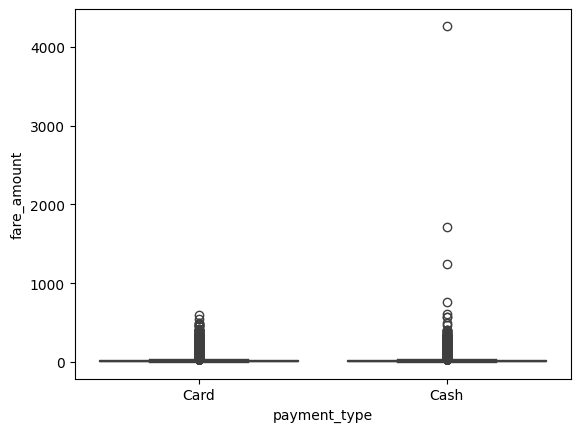

In [ ]:
# Check for the outliers
sns.boxplot(data=df, y='fare_amount',x='payment_type')
plt.show()

In [31]:
for i in df[['fare_amount','trip_distance','duration']]:

    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)

    IQR = q3-q1

    lower_bound = q1-1.5*IQR
    upper_bound = q3+1.5*IQR

    df = df[(df[i]>=lower_bound) & (df[i]<=upper_bound)]

We're interested on exploring the relationship between payment type and passenger behavior concerning trip distance and fare amount. Are there variations in the distribution of payment types concerning different fare amounts or trip distances?

To Investigate this, we'll plot histograms to visualize the distributions of passenger counts paying with either card or cash. This will also provide stakeholders with insight into fare amount ranges associated with different payment methods.

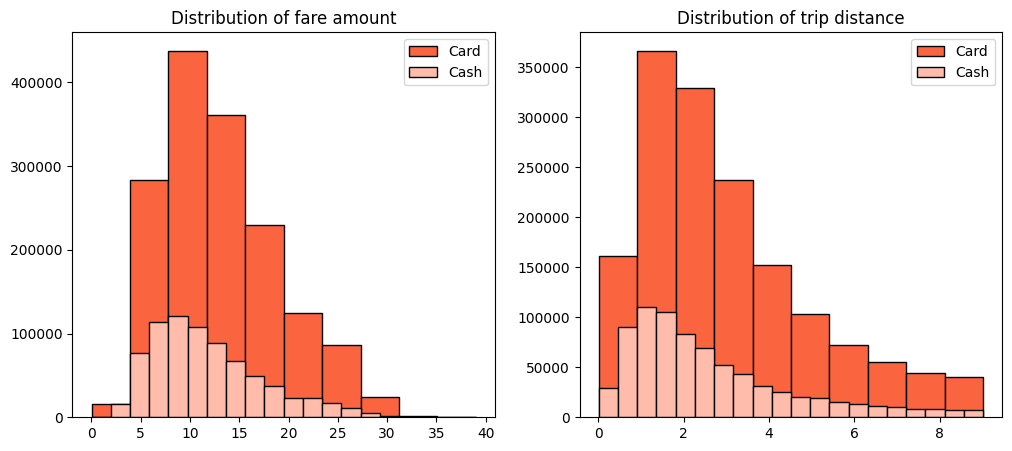

fare_amount           trip_distance          
                    mean       std          mean       std
payment_type                                              
Card           13.149007  5.879689      3.009029  2.007860
Cash           11.789805  5.642582      2.617152  1.928551

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(df[df['payment_type']=='Card']['fare_amount'],histtype='barstacked',bins=10, edgecolor='black', color='#FA643F',label='Card')
plt.hist(df[df['payment_type']=='Cash']['fare_amount'],histtype='barstacked',bins=20, edgecolor='black',color='#FFBCAB',label='Cash')
plt.title('Distribution of fare amount')
plt.legend()



plt.subplot(1,2,2)
plt.hist(df[df['payment_type']=='Card']['trip_distance'],histtype='barstacked',bins=10, edgecolor='black', color='#FA643F',label='Card')
plt.hist(df[df['payment_type']=='Cash']['trip_distance'],histtype='barstacked',bins=20, edgecolor='black',color='#FFBCAB',label='Cash')
plt.title('Distribution of trip distance')
plt.legend()
plt.show()



## Calculating the mean and standard deviation group by on payment type
df.groupby('payment_type').agg({'fare_amount':['mean','std'],'trip_distance':['mean','std']})

New, in order to examine the passenger's preference regarding their choice of payment method, we will assess the proportion of the two payment types. To provide a visual representation, we have opted to utilize a pie chart, This graphical depication will offer a clear and intuitive understanding of the distribution between the two payment methods chosen by passengers.

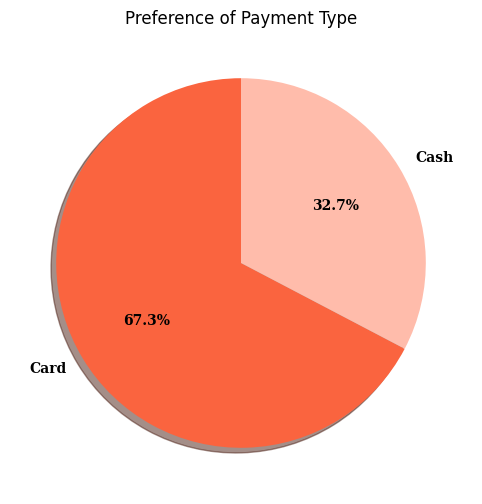

In [33]:
plt.figure(figsize=(12,6))
plt.title('Preference of Payment Type')
plt.pie(df['payment_type'].value_counts(normalize=True),labels=df['payment_type'].value_counts().index,
        startangle=90, shadow=True,autopct='%1.1f%%', colors=['#FA643F','#FFBCAB'],textprops={'color': 'black','fontsize':10,'weight': 'bold','family': 'serif'})
plt.show()

subsequently, we aim to conduct an analysis of the payment types in relation to the passenger count. Our objective is to investigate if there are any changes in preference contingent upon the number of passengers traveling in the cab.

To facilitate this examination, we have employed a visualization technique known as a stacked bar plot. this method is particularly advantageous for comparing the precentage distribution of each passenger count based on the payment method selected. Through this graphical representation, we can gain insights into potential variations in payment preferences across different passenger counts.

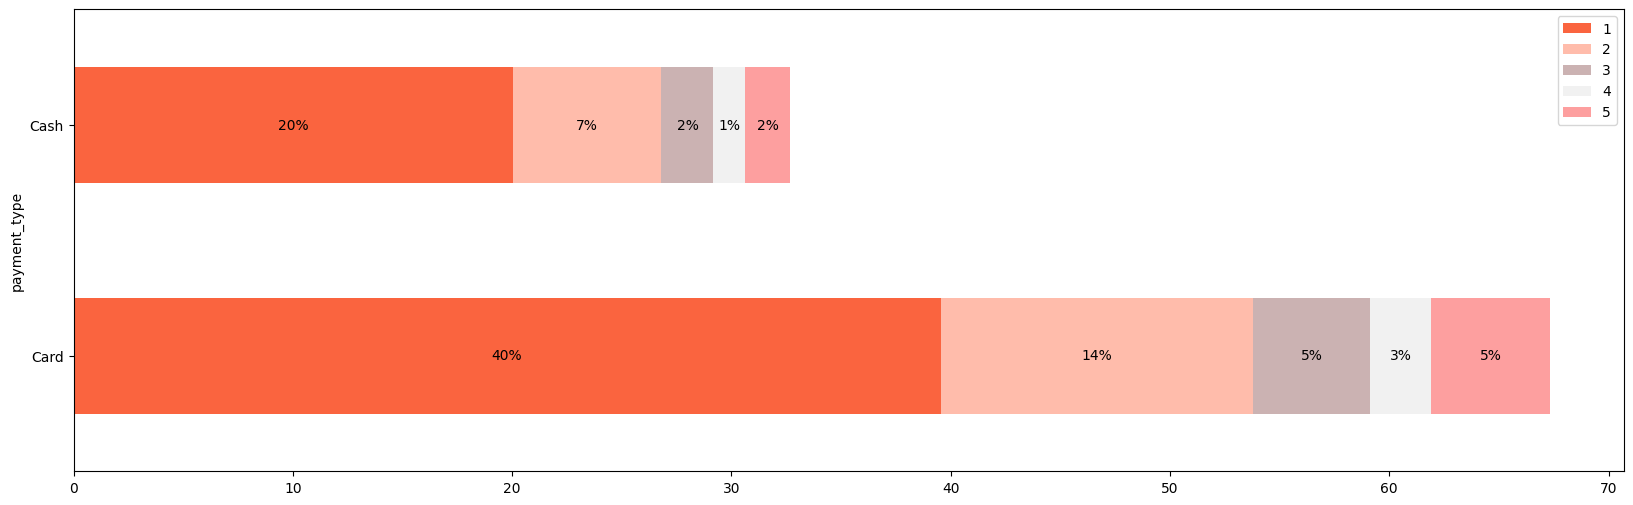

In [34]:
## Calculating the total passenger count distribution based on the different payment type
passenger_count = df.groupby(['payment_type','passenger_count'])[['passenger_count']].count()

##renaming the passenger_count to count to reset the index.
passenger_count.rename(columns={'passenger_count':'count'},inplace=True)
passenger_count.reset_index(inplace=True)


## calculating the precentage of the each passenger count
passenger_count['perc'] = (passenger_count['count']/passenger_count['count'].sum())*100



## Creating a new empty dataframe to store the distribution of each payment type. (useful for the visualization)
data = pd.DataFrame(columns= ['payment_type',1,2,3,4,5])
data['payment_type']=['Card','Cash']
data.iloc[0,1:] = passenger_count.iloc[:5,-1]
data.iloc[1,1:] = passenger_count.iloc[5:,-1]



fig, ax = plt.subplots(figsize=(20, 6))
data.plot(kind='barh', x='payment_type', stacked=True, color=['#FA643F', '#FFBCAB', '#CBB2B2', '#F1F1F1', '#FD9F9F'], ax=ax)

# Adding percentage text on the bars
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.text(
        x + width / 2,
        y + height / 2,
        '{:.0f}%'.format(width),
        horizontalalignment='center',
        verticalalignment='center'
    )

plt.show()


## **Hypothesis Testing**


In order to select the most suitable test for our initial step involves evaluating whethere the distribution of fare amount adheres to a normal distribution. While the histogram depicted above suggests otherwise, we will further confirm this by generating a QQ plot.

Quantile-quantile(QQ) plots can be used to assess whether the fare amount distributions for each payment type are approximately normally distributed. if the data points closely align with the diagonal line in the plot, it suggests that the data follows a normal distribution.




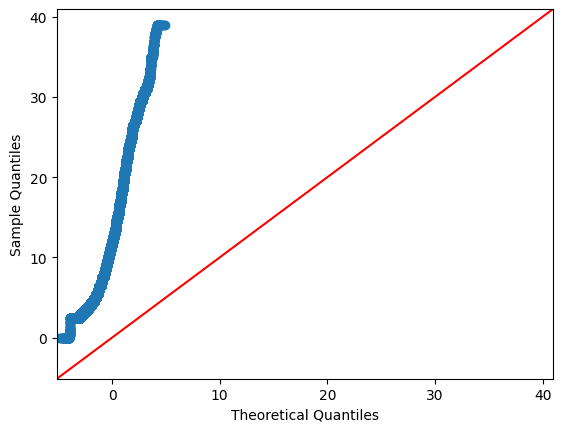

In [ ]:
import statsmodels.api as sm
sm.qqplot(df['fare_amount'],line='45')

Teh data values clearly do not follow the red 45 degree line, which is an indication that they do not follow a normal distribution. So Z distribution will not be good for this. That's why we will use T test.



Given that the T-Test can be applied to both small and large samples and does not require the population standard deviation, it is a more universally applicable approach for hypothesis testing in many practical research scenarios, including analysis of taxi trip data.



In the analysis of NYC Yellow Taxi Records, where you're likely dealing with an unknown population standard deviation and potentially large datasets. the T-Test offers a more appropriate and flexible method for comparing means between two groups (fare amounts by payment type). It provides a reliable way to infer about the population, accommodating the uncertainty that comes with estimating population parameters from sample data.

##### **Null Hypothesis:** There is no difference in average fare between customers who use 'Credit cards' and customers who use 'cash.'

##### **Alternative Hypothesis:** There is a difference in average fare between customers who use 'Credit cards' and customers who use 'cash.'

In [30]:
## Sample 1
card_sample = df[df['payment_type']=='Card']['fare_amount']

## Sample 2
cash_sample = df[df['payment_type']=='Cash']['fare_amount']

In [32]:
from scipy import stats

## Performing T-Test on both the different sample
t_stats, p_value = stats.ttest_ind(a=card_sample, b=cash_sample, equal_var=False)
print(f"T-Statistic: {t_stats:.4f}")
print(f"P-Value: {p_value:.4e}")

# Comparing the P value with the significance of 5% or 0.05.
if p_value < 0.05:
    print("Conclusion: Reject the null hypothesis (H₀). There is a significant difference in average fare between 'Credit card' and 'Cash' users.")
else:
    print("Conclusion: Fail to reject the null hypothesis (H₀). There is no significant difference in average fare between 'Credit card' and 'Cash' users.")

T-Statistic: 169.8370
P-Value: 0.0000e+00
Conclusion: Reject the null hypothesis (H₀). There is a significant difference in average fare between 'Credit card' and 'Cash' users.


We Reject the null hypothesis

 Since the p-value is significantly smaller than the significance level of 5% we will reject the null hypothesis.


There is a statistically significant difference in the average fare amount between customers who use credit cards and customers who use cash.


The Key busniess insight is the encouraging customers to pay with credit cards can generate more revenue for taxi cab drivers

